In [1]:
import numpy as np
import pandas as pd
import feather
from tqdm import tqdm
from joblib import Parallel, delayed
from sklearn.preprocessing import Imputer

In [3]:
df_train3 = feather.read_dataframe('../cache/train3.feather')

In [4]:
df_t = pd.read_csv('../data/transactions.csv')

In [6]:
df_t_20160103 = pd.read_csv('../cache/transactions_20160103.csv')

In [60]:
df_t_missing = pd.read_csv('../cache/transactions_missing.csv')

In [61]:
df_t.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [62]:
df_t.shape

(83489, 3)

In [63]:
df_t_20160103.shape

(53, 3)

In [64]:
df_t_missing.shape

(64, 3)

In [ ]:
df_t

In [10]:
df_t_20160103.head()

,date,store_nbr,transactions
0,2016-01-03,1,1216
1,2016-01-03,2,1841
2,2016-01-03,3,3378
3,2016-01-03,4,1538
4,2016-01-03,5,1374


In [65]:
df_t_missing.head()

,date,store_nbr,transactions
0,2013-06-19,10,1165
1,2013-06-19,35,432
2,2013-06-19,43,1188
3,2013-06-19,54,981
4,2014-01-02,32,676


In [11]:
len(set(df_t.store_nbr))

54

In [12]:
set(df_t.store_nbr) - set(df_train3.store_nbr)

set()

In [13]:
set(df_train3.store_nbr) - set(df_t.store_nbr)

set()

In [14]:
set(df_train3.date) - set(df_t.date)

{'2016-01-01', '2016-01-03'}

In [15]:
pd.value_counts(df_train3[df_train3['date'] == '2016-01-01'].store_nbr)

25    1718
Name: store_nbr, dtype: int64

In [16]:
df_t1 = df_t.set_index('date')

In [17]:
df_t1.loc['2013-01-01']

store_nbr        25
transactions    770
Name: 2013-01-01, dtype: int64

In [18]:
df_t1.loc['2014-01-01']

,store_nbr,transactions
date,,
2014-01-01,25,840
2014-01-01,36,487


In [19]:
df = df_t1.loc['2014-01-01']

In [20]:
df  = df.reset_index(drop=True)

In [21]:
df

,store_nbr,transactions
0,25,840
1,36,487


In [22]:
t = df.transactions[df.store_nbr == 36]

In [23]:
print(t.iloc[0])

487


In [24]:
df_t1.loc['2015-01-01']

store_nbr         25
transactions    2202
Name: 2015-01-01, dtype: int64

In [25]:
df_t.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [35]:
df_t1.loc['2017-01-01']

store_nbr         25
transactions    1642
Name: 2017-01-01, dtype: int64

In [26]:
#(fgs) watts@Magnus:~/lal/Kaggle/kagglefgs/cache$ more transactions_25_20160101.csv 
#│"date","transactions"
#│"2016-01-01",1776
#
df_t.loc[83488, ['date', 'store_nbr', 'transactions']] = ['2016-01-01', 25, 1776] 

In [27]:
df_t.store_nbr = df_t.store_nbr.astype('uint8')

In [28]:
df_t.transactions = df_t.transactions.astype('uint32')

In [29]:
df_t.tail()

,date,store_nbr,transactions
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802
83488,2016-01-01,25,1776


In [ ]:
# now for 2016-01-03

In [34]:
set(range(1,55)) - set(df_train3[df_train3['date'] == '2016-01-03'].store_nbr)

{52}

In [66]:
df_t2 = pd.concat([df_t, df_t_20160103, df_t_missing], axis=0)

In [67]:
df_t2.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [68]:
set(df_train3.store_nbr) - set(df_t2.store_nbr)

set()

In [69]:
set(df_t.date) - set(df_train3.date)

set()

In [70]:
set(df_train3.date) - set(df_t2.date)

set()

In [71]:
set(df_t2.store_nbr) - set(df_train3.store_nbr)

set()

In [72]:
df_t2.shape

(83606, 3)

In [73]:
df_train3['ds'] = df_train3['date'].astype('str') + '_' + df_train3['store_nbr'].astype('str')

In [74]:
df_t2['ds'] = df_t2['date'].astype('str') + '_' + df_t2['store_nbr'].astype('str')

In [75]:
set(df_t2.ds) - set(df_train3.ds)

set()

In [76]:
set(df_train3.ds) - set(df_t2.ds)

set()

In [77]:
df_t1 = df_t2

In [78]:
df_t1 = df_t1.drop('date', axis=1)
df_t1 = df_t1.drop('store_nbr', axis=1)

In [79]:
df_t1.head()

,transactions,ds
0,770,2013-01-01_25
1,2111,2013-01-02_1
2,2358,2013-01-02_2
3,3487,2013-01-02_3
4,1922,2013-01-02_4


In [80]:
df_t1.shape

(83606, 2)

In [81]:
df_t1.tail()

,transactions,ds
59,1368,2016-01-04_7
60,1927,2016-01-04_8
61,2115,2016-01-04_9
62,929,2016-09-27_23
63,1720,2016-09-27_7


In [82]:
df_t1.shape

(83606, 2)

In [83]:
df_train3.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,dcoilwtico,ds
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.14,2013-01-01_25
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,2013-01-01_25
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,2013-01-01_25
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,Santa Elena,D,1,93.14,2013-01-01_25
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,Santa Elena,D,1,93.14,2013-01-01_25


In [84]:
df_train3.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
family         0
class          0
perishable     0
city           0
state          0
store_type     0
cluster        0
dcoilwtico     0
ds             0
dtype: int64

In [85]:
set(df_train3['ds'].values) - set(df_t1['ds'].values)

set()

In [86]:
df_train4 = pd.merge(df_train3, df_t1, how='left', on='ds')

In [87]:
df_train4.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
store_type      0
cluster         0
dcoilwtico      0
ds              0
transactions    0
dtype: int64

In [88]:
df_train4.shape

(125497040, 16)

In [89]:
df_train4.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,dcoilwtico,ds,transactions
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.14,2013-01-01_25,770
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,2013-01-01_25,770
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,2013-01-01_25,770
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,Santa Elena,D,1,93.14,2013-01-01_25,770
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,Santa Elena,D,1,93.14,2013-01-01_25,770


In [90]:
df_train4['transactions'] = df_train4['transactions'].astype('int')

In [91]:
df_train4 = df_train4.drop('ds', axis=1)

In [92]:
df_train4.shape

(125497040, 15)

In [93]:
# save the file as each step
feather.write_dataframe(df_train4, '../cache/train4_t.feather')

In [2]:
df_train6 = feather.read_dataframe('../cache/train4_t.feather')

In [3]:
df_train6.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,dcoilwtico,transactions
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.14,770
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,770
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,770
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,Santa Elena,D,1,93.14,770
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,Santa Elena,D,1,93.14,770


In [4]:
df_train6.shape

(125497040, 15)

In [5]:
df_h = pd.read_csv('../data/holidays_events.csv')

In [6]:
df_h.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
df_h.shape

(350, 6)

In [8]:
len(set(df_h.date))

312

In [9]:
len(set(df_train6.date))

1684

In [10]:
pd.value_counts(df_h.type)

Holiday       221
Event          56
Additional     51
Transfer       12
Work Day        5
Bridge          5
Name: type, dtype: int64

In [11]:
pd.value_counts(df_h.locale)

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [12]:
pd.value_counts(df_h.transferred)

False    338
True      12
Name: transferred, dtype: int64

In [13]:
# 2013-01-05 - Saturday
# 2013-01-12 - Saturday
# 2014-12-20 - Saturday
# 2015-01-10 - Saturday
# 2016-11-12 - Saturday
df_h[df_h.type == 'Work Day']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [14]:
df_h[(df_h.type == 'Holiday') & (df_h.transferred == True)]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [15]:
df_h.loc[0]

date                   2012-03-02
type                      Holiday
locale                      Local
locale_name                 Manta
description    Fundacion de Manta
transferred                 False
Name: 0, dtype: object

In [16]:
df_h.type[(df_h.type == 'Holiday') & (df_h.transferred == True)] = 'Work Day'

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_h[(df_h.type == 'Holiday') & (df_h.transferred == True)]

,date,type,locale,locale_name,description,transferred


In [18]:
# df_train6['type'] = 'Work Day'

In [19]:
# df_train6['description'] = 'Normal'

In [20]:
# df_train6 = df_train6.drop(['type', 'description'], axis=1)

In [21]:
df_h_national = df_h[df_h.locale == 'National']

In [22]:
df_h_national.shape

(174, 6)

In [23]:
df_h_national = df_h_national.drop_duplicates(['date'], keep='first')

In [24]:
df_h_national.shape

(168, 6)

In [25]:
pd.value_counts(df_h_national.type)

Event         53
Holiday       52
Additional    37
Work Day      13
Transfer       8
Bridge         5
Name: type, dtype: int64

In [26]:
df_h_national.type[(df_h_national.type != 'Event') & (df_h_national.type != 'Work Day')] = 'Holiday'

In [27]:
pd.value_counts(df_h_national.type)

Holiday     102
Event        53
Work Day     13
Name: type, dtype: int64

In [28]:
df_h_national.head()

,date,type,locale,locale_name,description,transferred
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
19,2012-10-09,Work Day,National,Ecuador,Independencia de Guayaquil,True
20,2012-10-12,Holiday,National,Ecuador,Traslado Independencia de Guayaquil,False
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [29]:
df_h_national = df_h_national.drop(['transferred', 'locale', 'description', 'locale_name'], axis=1)

In [30]:
df_h_national.head()

,date,type
14,2012-08-10,Holiday
19,2012-10-09,Work Day
20,2012-10-12,Holiday
21,2012-11-02,Holiday
22,2012-11-03,Holiday


In [31]:
df_train6['d1'] = df_train6['date'].values

In [32]:
df_train6["d1"] = (pd.to_datetime(df_train6["d1"]))

In [33]:
df_train6.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,dcoilwtico,transactions,d1
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0,El Carmen,Manabi,C,3,47.57,802,2017-08-15
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0,El Carmen,Manabi,C,3,47.57,802,2017-08-15
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0,El Carmen,Manabi,C,3,47.57,802,2017-08-15
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0,El Carmen,Manabi,C,3,47.57,802,2017-08-15
125497039,125497039,2017-08-15,54,2116416,2.0,False,GROCERY I,1060,0,El Carmen,Manabi,C,3,47.57,802,2017-08-15


In [34]:
df_train6["dom"] = df_train6["d1"].apply(lambda x: x.day)
df_train6["mon"] = df_train6["d1"].apply(lambda x: x.month)
df_train6["dow"] = df_train6["d1"].apply(lambda x: x.weekday())
df_train6["doy"] = df_train6["d1"].apply(lambda x: x.timetuple().tm_yday)
df_train6["dcount"] = df_train6["d1"].apply(lambda x: x.toordinal())

In [35]:
df_train6 = df_train6.drop('d1', axis=1)

In [36]:
df_train6.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,dcoilwtico,transactions,dom,mon,dow,doy,dcount
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0,El Carmen,Manabi,C,3,47.57,802,15,8,1,227,736556
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0,El Carmen,Manabi,C,3,47.57,802,15,8,1,227,736556
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0,El Carmen,Manabi,C,3,47.57,802,15,8,1,227,736556
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0,El Carmen,Manabi,C,3,47.57,802,15,8,1,227,736556
125497039,125497039,2017-08-15,54,2116416,2.0,False,GROCERY I,1060,0,El Carmen,Manabi,C,3,47.57,802,15,8,1,227,736556


In [37]:
np.min(df_train6['dow'])

0

In [38]:
np.max(df_train6['dow'])

6

In [39]:
df_h_national.head()

,date,type
14,2012-08-10,Holiday
19,2012-10-09,Work Day
20,2012-10-12,Holiday
21,2012-11-02,Holiday
22,2012-11-03,Holiday


In [40]:
# df_h_national["date"] = (pd.to_datetime(df_h_national["date"]))

In [41]:
df_train7 = pd.merge(df_train6, df_h_national, how='left', on='date')

In [42]:
df_train7.shape

(125497040, 21)

In [43]:
df_train6.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,store_type,cluster,dcoilwtico,transactions,dom,mon,dow,doy,dcount
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.14,770,1,1,1,1,734869
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,770,1,1,1,1,734869
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,Santa Elena,D,1,93.14,770,1,1,1,1,734869
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,Santa Elena,D,1,93.14,770,1,1,1,1,734869
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,Santa Elena,D,1,93.14,770,1,1,1,1,734869


In [44]:
df_train6.shape

(125497040, 20)

In [45]:
df_train7.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,store_type,cluster,dcoilwtico,transactions,dom,mon,dow,doy,dcount,type
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,...,D,1,93.14,770,1,1,1,1,734869,Holiday
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,...,D,1,93.14,770,1,1,1,1,734869,Holiday
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,...,D,1,93.14,770,1,1,1,1,734869,Holiday
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,...,D,1,93.14,770,1,1,1,1,734869,Holiday
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,...,D,1,93.14,770,1,1,1,1,734869,Holiday


In [46]:
df_train7.isnull().sum()
# type            114199365

id                      0
date                    0
store_nbr               0
item_nbr                0
unit_sales              0
onpromotion             0
family                  0
class                   0
perishable              0
city                    0
state                   0
store_type              0
cluster                 0
dcoilwtico              0
transactions            0
dom                     0
mon                     0
dow                     0
doy                     0
dcount                  0
type            114412272
dtype: int64

In [47]:
df_train7[df_train7.type.isnull()].shape

(114412272, 21)

In [48]:
df_train7.type[(df_train7.type.isnull()) & (df_train7.dow == 5)] = 'Holiday'

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_train7.type[(df_train7.type.isnull()) & (df_train7.dow == 6)] = 'Holiday'

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_train7.isnull().sum()

id                     0
date                   0
store_nbr              0
item_nbr               0
unit_sales             0
onpromotion            0
family                 0
class                  0
perishable             0
city                   0
state                  0
store_type             0
cluster                0
dcoilwtico             0
transactions           0
dom                    0
mon                    0
dow                    0
doy                    0
dcount                 0
type            79903107
dtype: int64

In [51]:
df_train7.fillna('Work Day', inplace=True)

In [52]:
df_train7.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
store_type      0
cluster         0
dcoilwtico      0
transactions    0
dom             0
mon             0
dow             0
doy             0
dcount          0
type            0
dtype: int64

In [53]:
df_h_national = df_h[df_h.locale == 'National']

In [54]:
df_h_national.shape

(174, 6)

In [55]:
df_h_national = df_h_national.drop_duplicates(['date'], keep='first')

In [56]:
df_h_national.shape

(168, 6)

In [57]:
df_h_national.type[(df_h_national.type != 'Event') & (df_h_national.type != 'Work Day')] = 'Holiday'

In [58]:
df_h_national.head()

,date,type,locale,locale_name,description,transferred
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
19,2012-10-09,Work Day,National,Ecuador,Independencia de Guayaquil,True
20,2012-10-12,Holiday,National,Ecuador,Traslado Independencia de Guayaquil,False
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [59]:
df_h_national = df_h_national.drop(['transferred', 'locale', 'type', 'locale_name'], axis=1)

In [60]:
df_h_national.head()

,date,description
14,2012-08-10,Primer Grito de Independencia
19,2012-10-09,Independencia de Guayaquil
20,2012-10-12,Traslado Independencia de Guayaquil
21,2012-11-02,Dia de Difuntos
22,2012-11-03,Independencia de Cuenca


In [61]:
df_train8 = pd.merge(df_train7, df_h_national, how='left', on='date')

In [62]:
df_train8.isnull().sum()

id                      0
date                    0
store_nbr               0
item_nbr                0
unit_sales              0
onpromotion             0
family                  0
class                   0
perishable              0
city                    0
state                   0
store_type              0
cluster                 0
dcoilwtico              0
transactions            0
dom                     0
mon                     0
dow                     0
doy                     0
dcount                  0
type                    0
description     114412272
dtype: int64

In [63]:
df_train8.type[(df_train8.description.isnull()) & (df_train8.dow == 5)] = 'Weekend'

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_train8.type[(df_train8.description.isnull()) & (df_train8.dow == 6)] = 'Weekend'

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
df_train8.fillna('Normal', inplace=True)

In [66]:
df_train8.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
store_type      0
cluster         0
dcoilwtico      0
transactions    0
dom             0
mon             0
dow             0
doy             0
dcount          0
type            0
description     0
dtype: int64

In [67]:
df_train8.shape

(125497040, 22)

In [68]:
df_train8.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,cluster,dcoilwtico,transactions,dom,mon,dow,doy,dcount,type,description
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,...,1,93.14,770,1,1,1,1,734869,Holiday,Primer dia del ano
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,...,1,93.14,770,1,1,1,1,734869,Holiday,Primer dia del ano
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,...,1,93.14,770,1,1,1,1,734869,Holiday,Primer dia del ano
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,...,1,93.14,770,1,1,1,1,734869,Holiday,Primer dia del ano
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,...,1,93.14,770,1,1,1,1,734869,Holiday,Primer dia del ano


In [69]:
feather.write_dataframe(df_train8, '../cache/train8_t.feather')

In [2]:
df_train8 = feather.read_dataframe('../cache/train8_t.feather')

In [3]:
df_h = pd.read_csv('../data/holidays_events.csv')

In [4]:
df_h_local = df_h[df_h.locale == 'Local']

In [5]:
df_h_local.shape

(152, 6)

In [6]:
len(set(df_h_local.locale_name))

19

In [7]:
len(set(df_train8.city))

22

In [8]:
set(df_train8.city) - set(df_h_local.locale_name)

{'Babahoyo', 'Daule', 'Playas'}

In [9]:
df_h_local = df_h_local.drop_duplicates(['date'], keep='first')

In [10]:
df_h_local.shape

(138, 6)

In [11]:
df_h_local.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False


In [12]:
df_h_l1 = df_h_local.set_index('date')

In [13]:
import os
x = {i for i in range(20)}
os.sched_setaffinity(0, x)

In [14]:
def set_train_type_desc_local(date):
    t = df_h_l1.loc[date].type
    d = df_h_l1.loc[date].description
    c = df_h_l1.loc[date].locale_name

    df_train8.type[(df_train8.date == date) & (df_train8.city == c)] = t
    df_train8.description[(df_train8.date == date) & (df_train8.city == c)] = d

In [15]:
for date in tqdm(df_h_local.date):
    set_train_type_desc_local(date) 

  0%|          | 0/138 [00:00<?, ?it/s]/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
100%|██████████| 138/138 [2:02:55<00:00, 53.45s/it] 


In [16]:
df_h_regional = df_h[df_h.locale == 'Regional']

In [17]:
df_h_regional.shape

(24, 6)

In [18]:
len(set(df_h_regional.locale_name))

4

In [19]:
len(set(df_train8.state))

16

In [20]:
set(df_train8.state) - set(df_h_regional.locale_name)

{'Azuay',
 'Bolivar',
 'Chimborazo',
 'El Oro',
 'Esmeraldas',
 'Guayas',
 'Loja',
 'Los Rios',
 'Manabi',
 'Pastaza',
 'Pichincha',
 'Tungurahua'}

In [21]:
len(set(df_train8.state) - set(df_h_regional.locale_name))

12

In [22]:
df_h_regional = df_h_regional.drop_duplicates(['date'], keep='first')

In [23]:
df_h_regional.shape

(24, 6)

In [24]:
df_h_regional.head()

,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [25]:
df_h_r1 = df_h_regional.set_index('date')

In [26]:
def set_train_type_desc_regional(date):
    t = df_h_r1.loc[date].type
    d = df_h_r1.loc[date].description
    s = df_h_r1.loc[date].locale_name

    df_train8.type[(df_train8.date == date) & (df_train8.state == s)] = t
    df_train8.description[(df_train8.date == date) & (df_train8.state == s)] = d

In [27]:
for date in tqdm(df_h_regional.date):
    set_train_type_desc_regional(date) 

  0%|          | 0/24 [00:00<?, ?it/s]/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
100%|██████████| 24/24 [21:16<00:00, 53.20s/it]


In [28]:
df_train8.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,cluster,dcoilwtico,transactions,dom,mon,dow,doy,dcount,type,description
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0,El Carmen,...,3,47.57,802,15,8,1,227,736556,Work Day,Normal
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0,El Carmen,...,3,47.57,802,15,8,1,227,736556,Work Day,Normal
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0,El Carmen,...,3,47.57,802,15,8,1,227,736556,Work Day,Normal
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0,El Carmen,...,3,47.57,802,15,8,1,227,736556,Work Day,Normal
125497039,125497039,2017-08-15,54,2116416,2.0,False,GROCERY I,1060,0,El Carmen,...,3,47.57,802,15,8,1,227,736556,Work Day,Normal


In [29]:
df_train8.shape

(125497040, 22)

In [30]:
df_train9 = df_train8

In [31]:
df_train9 = df_train9.reset_index(drop=True)

In [32]:
df_train9.shape

(125497040, 22)

In [33]:
feather.write_dataframe(df_train9, '../cache/train9_t.feather')

In [34]:
df_train9['pd'] = 0 # payday

In [35]:
df_train9.pd[(df_train9.dom == 15)]= 1

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 1)]= 1
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 3)]= 1
df_train9.pd[(df_train9.dom == 30) & (df_train9.mon == 4)]= 1
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 5)]= 1
df_train9.pd[(df_train9.dom == 30) & (df_train9.mon == 6)]= 1
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 7)]= 1
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 8)]= 1
df_train9.pd[(df_train9.dom == 30) & (df_train9.mon == 9)]= 1
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 10)]= 1
df_train9.pd[(df_train9.dom == 30) & (df_train9.mon == 11)]= 1
df_train9.pd[(df_train9.dom == 31) & (df_train9.mon == 12)]= 1

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we c

In [37]:
df_train9.pd[df_train9.date == '2013-02-28']= 1
df_train9.pd[df_train9.date == '2014-02-28']= 1
df_train9.pd[df_train9.date == '2015-02-28']= 1
df_train9.pd[df_train9.date == '2016-02-29']= 1
df_train9.pd[df_train9.date == '2017-02-28']= 1

/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/rss/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we c

In [38]:
df_train9.shape

(125497040, 23)

In [39]:
df_train9.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
city            0
state           0
store_type      0
cluster         0
dcoilwtico      0
transactions    0
dom             0
mon             0
dow             0
doy             0
dcount          0
type            0
description     0
pd              0
dtype: int64

In [40]:
np.datetime64('2016-04-16') - np.datetime64('2013-01-01')

numpy.timedelta64(1201,'D')

In [41]:
(np.datetime64('2016-04-16') - np.datetime64('2016-04-08'))/np.timedelta64(7, 'D')

1.1428571428571428

In [42]:
int(np.ceil((np.datetime64('2016-04-16') - np.datetime64('2016-04-08'))/np.timedelta64(7, 'D')))

2

In [43]:
def weeks_before_earthquake(date):
    if np.datetime64('2016-04-16') <= np.datetime64(date):
        return 0
    return int(np.ceil((np.datetime64('2016-04-16') - np.datetime64(date))/np.timedelta64(7, 'D')))

In [44]:
def weeks_after_earthquake(date):
    if np.datetime64('2016-04-16') >= np.datetime64(date):
        return 0
    return int(np.ceil((np.datetime64(date) - np.datetime64('2016-04-16'))/np.timedelta64(7, 'D')))

In [45]:
df_train9['wbe'] = 0
df_train9['wae'] = 0

In [46]:
df_train9['wbe'] = df_train9['date'].map(lambda d: weeks_before_earthquake(d))

In [47]:
df_train9['wae'] = df_train9['date'].map(lambda d: weeks_after_earthquake(d))

In [48]:
df_train9.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,dom,mon,dow,doy,dcount,type,description,pd,wbe,wae
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,...,1,1,1,1,734869,Holiday,Primer dia del ano,0,172,0
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,...,1,1,1,1,734869,Holiday,Primer dia del ano,0,172,0
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,...,1,1,1,1,734869,Holiday,Primer dia del ano,0,172,0
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,...,1,1,1,1,734869,Holiday,Primer dia del ano,0,172,0
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,...,1,1,1,1,734869,Holiday,Primer dia del ano,0,172,0


In [49]:
df_train9[df_train9.date == '2016-04-16'].shape

(100966, 25)

In [50]:
df_train9[df_train9.date == '2016-04-16'].head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,dom,mon,dow,doy,dcount,type,description,pd,wbe,wae
76410846,76410846,2016-04-16,1,103665,4.0,False,BREAD/BAKERY,2712,1,Quito,...,16,4,5,107,736070,Event,Terremoto Manabi,0,0,0
76410847,76410847,2016-04-16,1,105574,11.0,False,GROCERY I,1045,0,Quito,...,16,4,5,107,736070,Event,Terremoto Manabi,0,0,0
76410848,76410848,2016-04-16,1,105575,7.0,False,GROCERY I,1045,0,Quito,...,16,4,5,107,736070,Event,Terremoto Manabi,0,0,0
76410849,76410849,2016-04-16,1,105577,3.0,False,GROCERY I,1045,0,Quito,...,16,4,5,107,736070,Event,Terremoto Manabi,0,0,0
76410850,76410850,2016-04-16,1,105737,3.0,False,GROCERY I,1044,0,Quito,...,16,4,5,107,736070,Event,Terremoto Manabi,0,0,0


In [51]:
df_train9[df_train9.date == '2016-04-17'].head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,dom,mon,dow,doy,dcount,type,description,pd,wbe,wae
76511812,76511812,2016-04-17,1,105574,32.0,False,GROCERY I,1045,0,Quito,...,17,4,6,108,736071,Event,Terremoto Manabi+1,0,0,1
76511813,76511813,2016-04-17,1,105575,6.0,False,GROCERY I,1045,0,Quito,...,17,4,6,108,736071,Event,Terremoto Manabi+1,0,0,1
76511814,76511814,2016-04-17,1,105577,12.0,False,GROCERY I,1045,0,Quito,...,17,4,6,108,736071,Event,Terremoto Manabi+1,0,0,1
76511815,76511815,2016-04-17,1,105737,6.0,False,GROCERY I,1044,0,Quito,...,17,4,6,108,736071,Event,Terremoto Manabi+1,0,0,1
76511816,76511816,2016-04-17,1,105857,1.0,False,GROCERY I,1092,0,Quito,...,17,4,6,108,736071,Event,Terremoto Manabi+1,0,0,1


In [52]:
df_train9[df_train9.date == '2016-04-15'].head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,dom,mon,dow,doy,dcount,type,description,pd,wbe,wae
76316906,76316906,2016-04-15,1,103665,4.0,False,BREAD/BAKERY,2712,1,Quito,...,15,4,4,106,736069,Work Day,Normal,1,1,0
76316907,76316907,2016-04-15,1,105574,3.0,False,GROCERY I,1045,0,Quito,...,15,4,4,106,736069,Work Day,Normal,1,1,0
76316908,76316908,2016-04-15,1,105575,13.0,False,GROCERY I,1045,0,Quito,...,15,4,4,106,736069,Work Day,Normal,1,1,0
76316909,76316909,2016-04-15,1,105577,2.0,False,GROCERY I,1045,0,Quito,...,15,4,4,106,736069,Work Day,Normal,1,1,0
76316910,76316910,2016-04-15,1,105857,13.0,False,GROCERY I,1092,0,Quito,...,15,4,4,106,736069,Work Day,Normal,1,1,0


In [53]:
df_train9['wfe'] = df_train9['wbe'].astype(int) + df_train9['wae'].astype(int)

In [54]:
df_train9.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,mon,dow,doy,dcount,type,description,pd,wbe,wae,wfe
0,0,2013-01-01,25,103665,7.0,Unk,BREAD/BAKERY,2712,1,Salinas,...,1,1,1,734869,Holiday,Primer dia del ano,0,172,0,172
1,1,2013-01-01,25,105574,1.0,Unk,GROCERY I,1045,0,Salinas,...,1,1,1,734869,Holiday,Primer dia del ano,0,172,0,172
2,2,2013-01-01,25,105575,2.0,Unk,GROCERY I,1045,0,Salinas,...,1,1,1,734869,Holiday,Primer dia del ano,0,172,0,172
3,3,2013-01-01,25,108079,1.0,Unk,GROCERY I,1030,0,Salinas,...,1,1,1,734869,Holiday,Primer dia del ano,0,172,0,172
4,4,2013-01-01,25,108701,1.0,Unk,DELI,2644,1,Salinas,...,1,1,1,734869,Holiday,Primer dia del ano,0,172,0,172


In [56]:
df_train9.shape

(125497040, 26)

In [55]:
feather.write_dataframe(df_train9, '../cache/train10_t.feather')

In [3]:
df_train10 = feather.read_dataframe('../cache/train10_t.feather')

In [4]:
df_train10.shape

(125497040, 26)

In [47]:
df_train11 = df_train10[(df_train10.store_nbr == 25) & (df_train10.item_nbr==103665) & (df_train10.wfe <=5)]

In [48]:
df_train11.shape

(49, 26)

In [49]:
df_train11.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,mon,dow,doy,dcount,type,description,pd,wbe,wae,wfe
79150597,79150597,2016-05-14,25,103665,6.0,True,BREAD/BAKERY,2712,1,Salinas,...,5,5,135,736098,Event,Terremoto Manabi+28,0,0,4,4
79253521,79253521,2016-05-15,25,103665,4.0,True,BREAD/BAKERY,2712,1,Salinas,...,5,6,136,736099,Event,Terremoto Manabi+29,1,0,5,5
79354156,79354156,2016-05-16,25,103665,1.0,True,BREAD/BAKERY,2712,1,Salinas,...,5,0,137,736100,Event,Terremoto Manabi+30,0,0,5,5
79540400,79540400,2016-05-18,25,103665,1.0,True,BREAD/BAKERY,2712,1,Salinas,...,5,2,139,736102,Work Day,Normal,0,0,5,5
79723319,79723319,2016-05-20,25,103665,1.0,True,BREAD/BAKERY,2712,1,Salinas,...,5,4,141,736104,Work Day,Normal,0,0,5,5


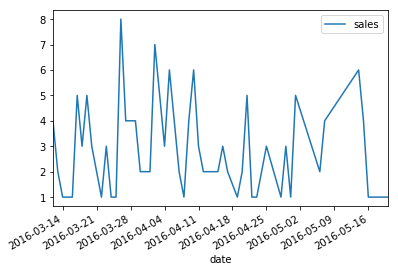

In [55]:

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame()
df['date'] = pd.to_datetime(df_train11['date'])
df['sales'] = df_train11.unit_sales.values
df.set_index(['date'],inplace=True)
df.plot()

In [16]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [40]:
1/sigmoid(-19)

178482301.96318725

In [ ]:
def quake_impact(date):
    if np.datetime64(date) <= np.datetime64('2016-04-16'):
        return 0
    delta=0.001
    days = int(np.ceil((np.datetime64(date) - np.datetime64('2016-04-16'))/np.timedelta64(7, 'D')))

In [6]:
# feather.write_dataframe(df_train10, '../cache/train10_t.feather')

In [7]:
# create a sample data frame

In [8]:
df_10 = df_train10.sample(frac=0.1, replace=False)

In [9]:
df_10.shape

(12549704, 26)

In [10]:
feather.write_dataframe(df_10, '../cache/train10_sample_10_t.feather')

In [11]:
df_1 = df_train10.sample(frac=0.01, replace=False)

In [12]:
df_1.shape

(1254970, 26)

In [13]:
feather.write_dataframe(df_1, '../cache/train10_sample_1_t.feather')

In [ ]:
# preperae validation set

In [17]:
def is_valid(d):
    if (np.datetime64(d) >= np.datetime64('2017-08-01')) & (np.datetime64(d) <= np.datetime64('2017-08-15')):
        return 1
    return 0

In [18]:
df_train10['valid'] = df_train10['date'].map(lambda x: is_valid(x))

In [19]:
df_valid = df_train10[df_train10.valid == 1]

In [20]:
df_valid.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,dow,doy,dcount,type,description,pd,wbe,wae,wfe,valid
123926072,123926072,2017-08-01,1,103520,3.0,False,GROCERY I,1028,0,Quito,...,1,213,736542,Work Day,Normal,0,0,68,68,1
123926073,123926073,2017-08-01,1,103665,4.0,False,BREAD/BAKERY,2712,1,Quito,...,1,213,736542,Work Day,Normal,0,0,68,68,1
123926074,123926074,2017-08-01,1,105574,8.0,False,GROCERY I,1045,0,Quito,...,1,213,736542,Work Day,Normal,0,0,68,68,1
123926075,123926075,2017-08-01,1,105575,14.0,False,GROCERY I,1045,0,Quito,...,1,213,736542,Work Day,Normal,0,0,68,68,1
123926076,123926076,2017-08-01,1,105693,1.0,False,GROCERY I,1034,0,Quito,...,1,213,736542,Work Day,Normal,0,0,68,68,1


In [21]:
df_valid.shape

(1570968, 27)

In [22]:
df_valid.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,...,dow,doy,dcount,type,description,pd,wbe,wae,wfe,valid
125497035,125497035,2017-08-15,54,2089339,4.0,False,GROCERY I,1006,0,El Carmen,...,1,227,736556,Work Day,Normal,1,0,70,70,1
125497036,125497036,2017-08-15,54,2106464,1.0,True,BEVERAGES,1148,0,El Carmen,...,1,227,736556,Work Day,Normal,1,0,70,70,1
125497037,125497037,2017-08-15,54,2110456,192.0,False,BEVERAGES,1120,0,El Carmen,...,1,227,736556,Work Day,Normal,1,0,70,70,1
125497038,125497038,2017-08-15,54,2113914,198.0,True,CLEANING,3040,0,El Carmen,...,1,227,736556,Work Day,Normal,1,0,70,70,1
125497039,125497039,2017-08-15,54,2116416,2.0,False,GROCERY I,1060,0,El Carmen,...,1,227,736556,Work Day,Normal,1,0,70,70,1


In [23]:
feather.write_dataframe(df_valid, '../cache/train10_valid_t.feather')